In [7]:
# NumPy
import numpy as np

# Import tools to run the simulation
import ase.md
import ase.md.velocitydistribution
import ase.units

# Integration with ASE calculator for metatensor atomistic models
from metatensor.torch.atomistic.ase_calculator import MetatensorCalculator

# Plotting
import matplotlib.pyplot as plt
import ase.visualize.plot

# The SOAP-BPNN model contains compiled extensions from rascaline.torch
import rascaline.torch

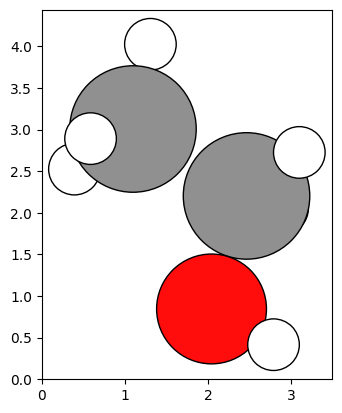

In [8]:
# Initial positions (reading them from a file):
atoms = ase.io.read("../../tests/resources/ethanol_reduced_100.xyz")

# Initialize the velocities:
ase.md.velocitydistribution.MaxwellBoltzmannDistribution(atoms, temperature_K=300)

# Load the model and register it as the energy calculator for these ``atoms``:
atoms.calc = MetatensorCalculator("exported-model.pt")

# Define the integrator:
integrator = ase.md.VelocityVerlet(
    atoms,
    timestep=1.0 * ase.units.fs
)


# Plot the initial configuration:
ase.visualize.plot.plot_atoms(atoms)
plt.show()

In [9]:
potential_energy = []
kinetic_energy = []
total_energy = []
trajectory = []

for step in range(100):
    # run a single simulation step
    integrator.run(1)

    # collect data about the simulation
    potential_energy.append(atoms.get_potential_energy())
    kinetic_energy.append(atoms.get_kinetic_energy())
    total_energy.append(atoms.get_total_energy())
    trajectory.append(atoms.copy())

# Convert to numpy arrays
potential_energy = np.array(potential_energy)
kinetic_energy = np.array(kinetic_energy)
total_energy = np.array(total_energy)

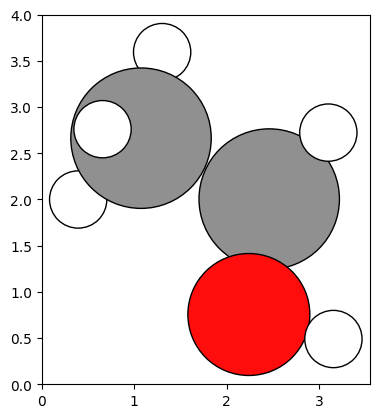

In [10]:
# Plot the final configuration:
ase.visualize.plot.plot_atoms(trajectory[99])
plt.show()

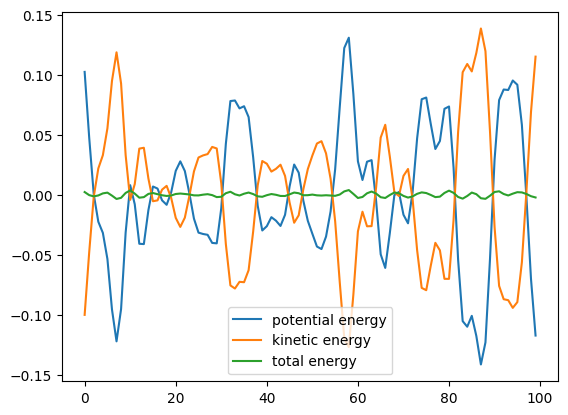

In [11]:
# Check energy conservation
plt.plot(range(100), potential_energy-potential_energy.mean(), label="potential energy")
plt.plot(range(100), kinetic_energy-kinetic_energy.mean(), label="kinetic energy")
plt.plot(range(100), total_energy-total_energy.mean(), label="total energy")
plt.legend()
plt.show()